In [1]:
# Tetsuya T氏の「Pythonによる科学技術入門」講義を参考にさせていただきました
# https://www.udemy.com/course/python-numerical-methods/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib inline

In [3]:
R0 = 3
Gamma = 0.25
Beta = R0 * Gamma

S_init = 999
I_init = 1
R_init = 0

N = S_init + I_init + R_init
N_init = [S_init, I_init, R_init]
T_span = [0, 500]

In [4]:
def ODE(t, Nt, Beta, Gamma, N):
    dS = - Beta * Nt[0] * Nt[1] / N
    dI = Beta * Nt[0] * Nt[1] / N - Gamma * Nt[1]
    dR = Gamma * Nt[1]
    dN = [dS, dI, dR]
    return dN

In [5]:
dt = 0.01
t = np.arange(0, 50, dt)
solved_data = solve_ivp(ODE, T_span, N_init, t_eval= t, args=(Beta, Gamma, N,))

In [6]:
print(solved_data)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 332
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.000e+00, 1.000e-02, 2.000e-02, ..., 4.997e+01, 4.998e+01,
       4.999e+01])
 t_events: None
        y: array([[9.99000000e+02, 9.98992489e+02, 9.98984940e+02, ...,
        5.98796973e+01, 5.98794586e+01, 5.98792204e+01],
       [1.00000000e+00, 1.00500496e+00, 1.01003490e+00, ...,
        5.32977463e-01, 5.31887314e-01, 5.30799452e-01],
       [0.00000000e+00, 2.50625100e-03, 5.02504560e-03, ...,
        9.39587325e+02, 9.39588654e+02, 9.39589980e+02]])
 y_events: None


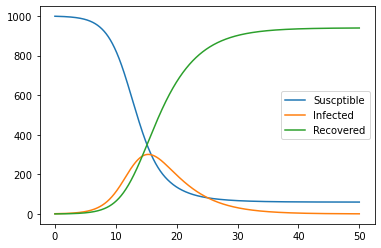

In [7]:
plt.plot(t, solved_data.y[0], label="Suscptible")
plt.plot(t, solved_data.y[1], label="Infected")
plt.plot(t, solved_data.y[2], label="Recovered")
plt.legend()
plt.show()